# 미로 주행 테스트

현대모비스에서는 운전자와 탑승자의 편의를 위한 인포테인먼트 헤드유닛이 탑재되어 있습니다. 인포테인먼트 헤드유닛은 운전자와 탑승자에게 차량내/외의 다양한 정보를 제공하면서 동시에 내비게이션, 음성인식, 텔레매틱스 서비스, 멀티미디어 기능 등 엔터테인먼트 및 편의 서비스를 통합적으로 제공하는 기기입니다.

n × m 직사각형 격자 모양의 도로가 나 있는 미로가 있습니다. 미로에서 왼쪽 아래 구석의 좌표는 (0, 0), 오른쪽 위 구석의 좌표는 (n, m) 입니다. 정수 좌표 (a, b)에는 표지판이 있습니다. 자동차의 내비게이션 기능과 차량의 주행 능력을 검증하기 위해 미로의 다양한 위치에서 출발하여 표지판까지 최단 경로를 따라 이동한 테스트 기록이 있습니다. 각 테스트는 출발점의 좌표, 남은 연료량에 따른 최대 주행 거리, 표지판 도달 여부가 기록되어 있습니다. 출발점의 위치와 표지판의 위치가 같을 수 있으며, 이때는 최대 주행 거리에 상관없이 항상 표지판에 도달한 것으로 간주합니다.

테스트 기록을 토대로 표지판의 위치를 알아내려 합니다. 예를 들어 n = 3, m = 5이고 테스트 기록이 다음과 같은 경우를 생각해 봅시다.
이때 표지판이 있을 수 있는 좌표는 (2, 4), (2, 5), (3, 3), (3, 4)의 4개입니다.

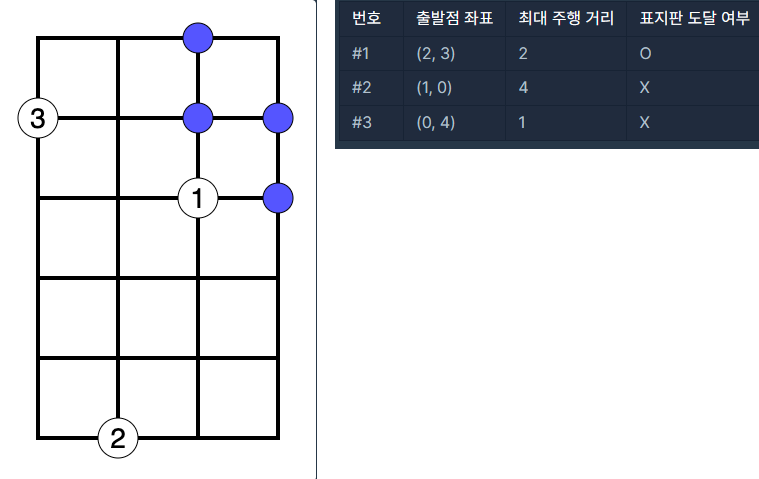

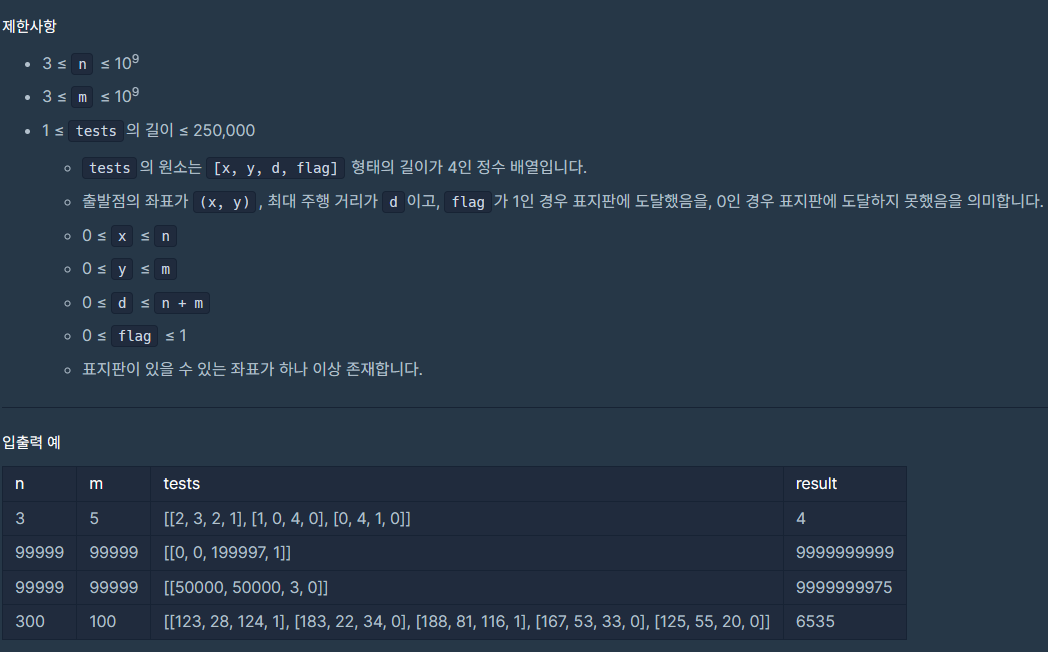

|n|m|tests|result|
|:---|:---|:---|:---|
|3|5|[[2, 3, 2, 1], [1, 0, 4, 0], [0, 4, 1, 0]]|4|
|99999|99999|[[0, 0, 199997, 1]]|9999999999|
|99999|99999|[[50000, 50000, 3, 0]]|9999999975|
|300|100|[[123, 28, 124, 1], [183, 22, 34, 0], [188, 81, 116, 1], [167, 53, 33, 0], [125, 55, 20, 0]]|6535|

In [ ]:
표지판을 지나온 것을 기준으로 정렬한뒤 플래깅처리를 하고 1, 표지판을 못찾은 길들을 x로 표기
배열을 돌면서 1과 0인 녀석들만 

In [102]:
%reload_ext nbtutor

In [ ]:
from collections import deque

n = 300+1
m = 100+1
mn_table = [['R']*n for _ in range(m)]

tests = [[123, 28, 124, 1], [183, 22, 34, 0], [188, 81, 116, 1], [167, 53, 33, 0], [125, 55, 20, 0]]	

pos_arr = [(-1,0), (0, 1), (1, 0), (0, -1)]

queue_mn = deque()
for item in tests:
    mn_table[m-item[1]-1][item[0]] = 'C'
    queue_mn.append((m-item[1]-1, item[0], item[2], item[3]))

while queue_mn:
    pos_mn = queue_mn.popleft()
    for pos in pos_arr:
        if pos_mn[2] == 0:
            continue
        if pos_mn[0]+pos[0] < 0 or pos_mn[0]+pos[0] > m-1:
            continue
        if pos_mn[1]+pos[1] <0 or pos_mn[1]+pos[1] > n-1:
            continue
        if mn_table[pos_mn[0]+pos[0]][pos_mn[1]+pos[1]] == 'N' or mn_table[pos_mn[0]+pos[0]][pos_mn[1]+pos[1]] == 'C':
            queue_mn.append((pos_mn[0]+pos[0],pos_mn[1]+pos[1], pos_mn[2]-1, pos_mn[3]))
            continue
        
        if mn_table[pos_mn[0]+pos[0]][pos_mn[1]+pos[1]] != 'N' and pos_mn[3] == 1:
            mn_table[pos_mn[0]+pos[0]][pos_mn[1]+pos[1]] = 'S'
        else :
            mn_table[pos_mn[0]+pos[0]][pos_mn[1]+pos[1]] = 'N'
            
        queue_mn.append((pos_mn[0]+pos[0],pos_mn[1]+pos[1], pos_mn[2]-1, pos_mn[3]))
            
total_cnt = 0
[total_cnt := total_cnt + x.count('S') for x in mn_table]
print(total_cnt)

In [113]:
from collections import deque

n = 3+1
m = 5+1
mn_table = [['R']*n for _ in range(m)]

tests =[[2, 3, 2, 1], [1, 0, 4, 0], [0, 4, 1, 0]]

pos_arr = [(-1,0), (0, 1), (1, 0), (0, -1)]

# ROAD, CAR, SIGN
# 방문된 지역을 먼저 처리하고 루프를 돌리는게 낫지 않을까 했는데...상관이 없으려나..
for item in sorted(tests, key=lambda x:(-x[3],-x[1])):
    mn_table[m-item[1]-1][item[0]] = 'C'
    
    #mn_좌표 및 이동가능 거리 입력
    queue = deque()
    queue_mn = deque([(m-item[1]-1, item[0], item[2])])
    
    if item[3] == 1:
        while queue_mn:
            pos_mn = queue_mn.popleft()
            for pos in pos_arr:
                
                if pos_mn[2] == 0:
                    continue
                if pos_mn[0]+pos[0] < 0 or pos_mn[0]+pos[0] > m-1:
                    continue
                if pos_mn[1]+pos[1] <0 or pos_mn[1]+pos[1] > n-1:
                    continue
                if mn_table[pos_mn[0]+pos[0]][pos_mn[1]+pos[1]] == 'S':
                    queue_mn.append((pos_mn[0]+pos[0],pos_mn[1]+pos[1], pos_mn[2]-1))
                    continue
                
                if mn_table[pos_mn[0]+pos[0]][pos_mn[1]+pos[1]] == 'R':
                    mn_table[pos_mn[0]+pos[0]][pos_mn[1]+pos[1]] = 'S'
                    queue_mn.append((pos_mn[0]+pos[0],pos_mn[1]+pos[1], pos_mn[2]-1))
                
    # C!= R
    else:
        while queue_mn:
            pos_mn = queue_mn.popleft()
            for pos in pos_arr:
                if pos_mn[2] == 0:
                    continue
                if pos_mn[0]+pos[0] < 0 or pos_mn[0]+pos[0] > m-1:
                    continue
                if pos_mn[1]+pos[1] <0 or pos_mn[1]+pos[1] > n-1:
                    continue
                if mn_table[pos_mn[0]+pos[0]][pos_mn[1]+pos[1]] == 'R':
                    queue_mn.append((pos_mn[0]+pos[0],pos_mn[1]+pos[1], pos_mn[2]-1))
                    continue
            
                if mn_table[pos_mn[0]+pos[0]][pos_mn[1]+pos[1]] != 'C':
                    mn_table[pos_mn[0]+pos[0]][pos_mn[1]+pos[1]] = 'R'
                    queue_mn.append((pos_mn[0]+pos[0],pos_mn[1]+pos[1], pos_mn[2]-1))
                    
                
total_cnt = 0
[total_cnt := total_cnt + x.count('S') for x in mn_table]
print(total_cnt)

4
